In [1]:
import pandas as pd
import numpy as np 

# Read the dataset
data = pd.read_csv('/datasets/eteplygina/combined_data.csv')

# Group the data by patient ID
grouped_data = data.groupby('id')

# Initialize empty lists to store features and labels
all_features = []
all_labels = []

# Iterate over each group (ID)
for _, group in grouped_data:
    # Interpolate missing values in vital sign measurements
    vital_signs = ['heartrate', 'sbp', 'dbp', 'mbp', 'respiration', 'temperature', 'spo2']
    
    # Calculate features for each vital sign measurement
    features = {}
    features['id'] = group['id'].iloc[0]  
    
    for vital_sign in vital_signs:
        features[f'mean_{vital_sign}'] = group[vital_sign].mean()
        features[f'median_{vital_sign}'] = group[vital_sign].median()
        features[f'max_{vital_sign}'] = group[vital_sign].max()
        features[f'min_{vital_sign}'] = group[vital_sign].min()
        features[f'std_{vital_sign}'] = group[vital_sign].std()
    
    
    
    all_features.append(features)
    label = group['label'].iloc[0]
    all_labels.append(label)

# Convert the list of dictionaries to a DataFrame
features_df = pd.DataFrame(all_features)
features_df.interpolate(method='linear', inplace=True)
labels_df = pd.DataFrame({'id': features_df['id'], 'label': all_labels})

print(features_df)
print(labels_df)


             id  mean_heartrate  median_heartrate  max_heartrate  \
0      30000213       82.955882              83.0           91.0   
1      30001148       68.045714              65.0           95.0   
2      30001336       62.573446              62.5           76.0   
3      30001396       81.705882              84.0           93.0   
4      30001471       82.473545              81.5          107.0   
...         ...             ...               ...            ...   
15718  39996870       71.167814              62.0          131.0   
15719  39997753       77.853035              76.0           97.0   
15720  39998138       37.162500              35.0           71.0   
15721  39999286      113.095238             112.0          127.0   
15722  39999810       65.178161              63.0           93.0   

       min_heartrate  std_heartrate    mean_sbp  median_sbp  max_sbp  min_sbp  \
0               66.0       6.358527  134.676471       133.0    179.0    116.0   
1               61.0 

In [2]:
# # Check the number of unique categories in the 'ethnicity' column
# num_unique_ethnicities = data['ethnicity'].nunique()
# print("Number of unique ethnicities:", num_unique_ethnicities)
# Check for NaN values in the DataFrame
nan_columns = features_df.columns[features_df.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)


Columns with NaN values: []


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


X = features_df.drop(columns=['id'])  
y = labels_df['label'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Class distribution in training set:")
print(y_train.value_counts())

# Check the class distribution in the test set
print("\nClass distribution in test set:")
print(y_test.value_counts())

Class distribution in training set:
0    10028
1     2550
Name: label, dtype: int64

Class distribution in test set:
0    2508
1     637
Name: label, dtype: int64


[I 2024-06-26 00:32:07,038] A new study created in memory with name: no-name-d1f7acf3-18de-4e21-b06b-b0075ec4b7df
[I 2024-06-26 00:32:07,218] Trial 0 finished with value: 0.7613814756671899 and parameters: {'C': 0.04391930755502881, 'solver': 'sag'}. Best is trial 0 with value: 0.7613814756671899.
[I 2024-06-26 00:32:07,268] Trial 1 finished with value: 0.7598116169544741 and parameters: {'C': 0.0492852134091316, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.7613814756671899.
[I 2024-06-26 00:32:07,354] Trial 2 finished with value: 0.7613814756671899 and parameters: {'C': 0.11735038233427751, 'solver': 'liblinear'}. Best is trial 0 with value: 0.7613814756671899.
[I 2024-06-26 00:32:07,420] Trial 3 finished with value: 0.7566718995290423 and parameters: {'C': 1.0748067469355451, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.7613814756671899.
[I 2024-06-26 00:32:07,534] Trial 4 finished with value: 0.7598116169544741 and parameters: {'C': 1.86423573836441, 'solver': 'liblinear'}

Best Hyperparameters: {'C': 0.057589266515806245, 'solver': 'liblinear'}
Best Model Recall: 0.7629513343799058
Accuracy: 0.7424483306836248
Precision: 0.4244541484716157
Recall: 0.7629513343799058
F1 Score: 0.5454545454545455
Confusion Matrix:
[[1849  659]
 [ 151  486]]


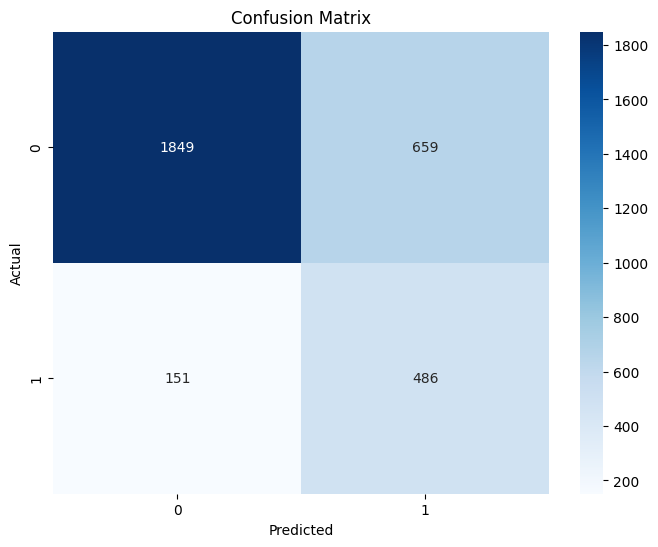

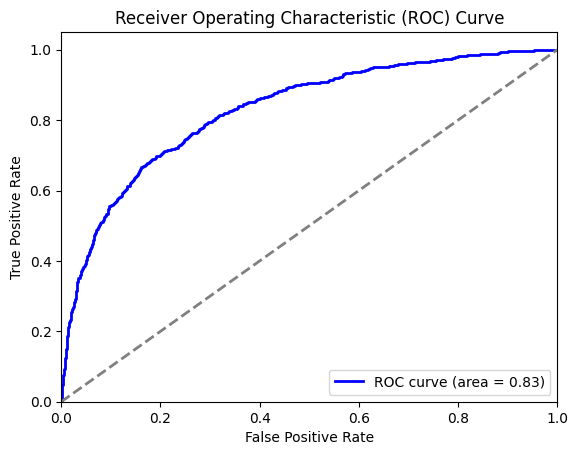

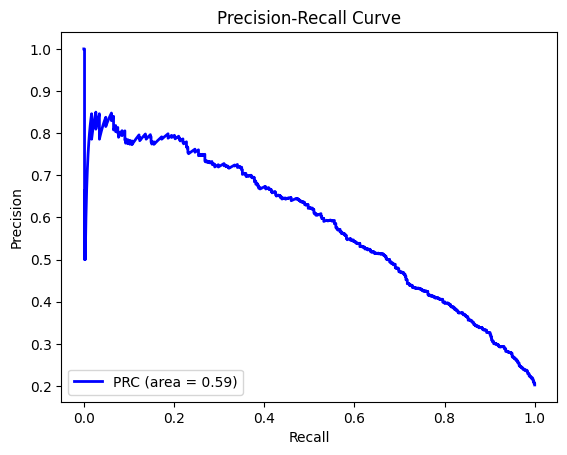

               Feature  Coefficient  Absolute_Coefficient
30           mean_spo2     0.519115              0.519115
10            mean_dbp    -0.483499              0.483499
15            mean_mbp     0.457351              0.457351
27     max_temperature     0.429533              0.429533
3        min_heartrate     0.371094              0.371094
11          median_dbp    -0.367754              0.367754
8              min_sbp    -0.366035              0.366035
4        std_heartrate     0.331085              0.331085
9              std_sbp     0.328569              0.328569
34            std_spo2     0.308882              0.308882
5             mean_sbp    -0.279209              0.279209
16          median_mbp     0.268184              0.268184
12             max_dbp    -0.232295              0.232295
7              max_sbp    -0.178007              0.178007
20    mean_respiration     0.175018              0.175018
17             max_mbp     0.168678              0.168678
29     std_tem

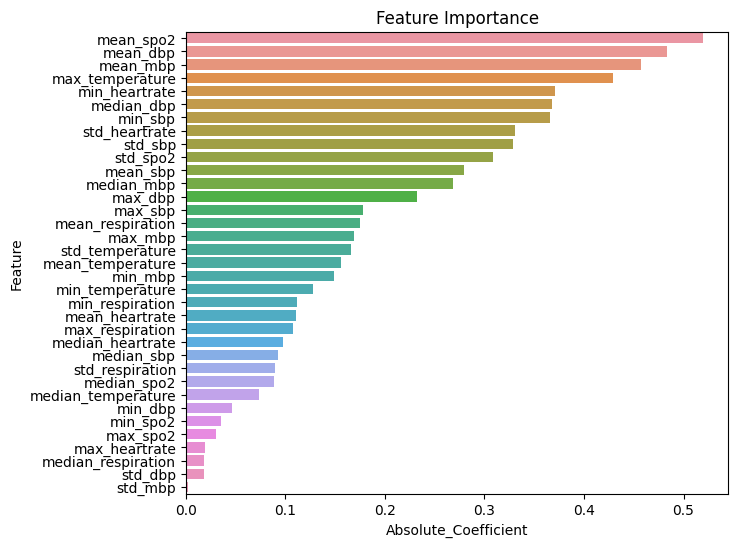

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
import optuna
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    C = trial.suggest_float('C', 0.01, 10.0, log=True)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'sag', 'saga'])
    
    model = LogisticRegression(
        C=C,
        solver=solver,
        max_iter=16000,
        penalty='l2',
        class_weight='balanced'
    )
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate recall
    recall = recall_score(y_test, y_pred)
    
    return recall

# Create the Optuna study
study = optuna.create_study(direction='maximize')

# Run the optimization
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_hyperparams = study.best_params
print(f"Best Hyperparameters: {best_hyperparams}")

# Train the best model
best_model = LogisticRegression(
    C=best_hyperparams['C'],
    solver=best_hyperparams['solver'],
    max_iter=16000,
    penalty='l2',
    class_weight='balanced'
)
best_model.fit(X_train_scaled, y_train)


# Evaluate the best model
y_pred = best_model.predict(X_test_scaled)
recall = recall_score(y_test, y_pred)
print(f"Best Model Recall: {recall}")

# Additional evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
prc_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'PRC (area = {prc_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Retrieve feature names
feature_names = X_train.columns

# Retrieve coefficients
coefficients = best_model.coef_[0]

# Create a DataFrame to store feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values to identify the most influential features
coefficients_df['Absolute_Coefficient'] = np.abs(coefficients_df['Coefficient'])
sorted_coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the sorted coefficients DataFrame
print(sorted_coefficients_df)

# Plot feature importance
plt.figure(figsize=(7, 6))
sns.barplot(x='Absolute_Coefficient', y='Feature', data=sorted_coefficients_df)
plt.title('Feature Importance')
plt.show()
